# Base ENV

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('Train_Dataset.csv')
df_val= pd.read_csv('Validation_Dataset.csv')

# Second ENV

In [3]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [5]:
print(df.shape)
print(df_val.shape)

(2321, 21)
(1000, 21)


In [6]:
df.describe()

customer_id  account_length  location_code  number_vm_messages  \
count  2321.000000     2319.000000    2321.000000         2318.000000   
mean   2161.000000      101.400172     473.470918            7.557377   
std     670.159309       40.044985      42.011853           14.250001   
min    1001.000000        1.000000     445.000000         -202.000000   
25%    1581.000000       74.000000     445.000000            0.000000   
50%    2161.000000      101.000000     452.000000            0.000000   
75%    2741.000000      127.000000     452.000000           14.000000   
max    3321.000000      232.000000     547.000000           51.000000   

       total_day_min  total_day_calls  total_day_charge  total_eve_min  \
count    2320.000000      2318.000000       2316.000000    2318.000000   
mean      182.718103       105.324418         30.961524     203.511734   
std        73.332822       221.100535          9.830271     115.552100   
min      -179.900000        -1.000000        -25.600000    -103.300000   
25%       144.000000        87.000000         24.480000     165.925000   
50%       180.350000       102.000000         30.600000     202.400000   
75%       221.000000       115.000000         37.590000     236.400000   
max      2283.900000     10700.000000         60.960000    5186.400000   

       total_eve_calls  total_eve_charge  total_night_minutes  \
count      2317.000000       2313.000000          2319.000000   
mean        100.125162         17.123130           209.543467   
std          20.536224          4.327327           408.066120   
min         -80.000000          0.000000            23.200000   
25%          87.000000         14.180000           167.350000   
50%         101.000000         17.210000           201.100000   
75%         114.000000         20.090000           235.050000   
max         170.000000         30.830000         19700.000000   

       total_night_calls  total_night_charge  total_intl_minutes  \
count        2316.000000         2316.000000         2319.000000   
mean           87.641192            9.436710           10.247736   
std            12.737232           18.656075            2.795472   
min            33.000000            1.040000           -9.300000   
25%            79.000000            7.530000            8.600000   
50%            90.000000            9.050000           10.300000   
75%            98.000000           10.582500           12.000000   
max           105.000000          900.150000           18.300000   

       total_intl_calls  total_intl_charge  customer_service_calls  \
count       2318.000000        2316.000000             2320.000000   
mean           4.439172           2.773364                1.651724   
std            2.461172           0.733526                1.429166   
min            0.000000           0.000000                0.000000   
25%            3.000000           2.320000                1.000000   
50%            4.000000           2.780000                1.000000   
75%            6.000000           3.240000                2.000000   
max           20.000000           4.940000                9.000000   

       Unnamed: 20  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN

In [10]:
df.head()

customer_id  account_length  location_code intertiol_plan voice_mail_plan  \
0         1001            15.0            452             no              no   
1         1002           105.0            452             no              no   
2         1003            97.0            452             no             yes   
3         1004           121.0            445             no             yes   
4         1005            98.0            452             no             yes   

   number_vm_messages  total_day_min  total_day_calls  total_day_charge  \
0                 0.0          121.1            130.0             20.59   
1                 0.0          259.3             96.0             44.08   
2                32.0          183.4             94.0             31.18   
3                35.0           68.7             95.0             11.68   
4                22.0          278.3             89.0             47.31   

   total_eve_min  ...  total_eve_charge  total_night_minutes  \
0          216.0  ...             18.36                235.1   
1          175.2  ...             14.89                222.4   
2          269.1  ...             22.87                203.5   
3          209.2  ...             17.78                197.4   
4           93.4  ...              7.94                107.6   

   total_night_calls  total_night_charge  total_intl_minutes  \
0               33.0               10.58                16.1   
1               36.0               10.01                12.0   
2               38.0                9.16                 6.7   
3               42.0                8.88                11.4   
4               42.0                4.84                 9.7   

   total_intl_calls  total_intl_charge  customer_service_calls  Churn  \
0               5.0               4.35                     2.0     No   
1               5.0               3.24                     3.0     No   
2               4.0               1.81                     5.0     No   
3               4.0               3.08                     1.0     No   
4               5.0               2.62                     0.0     No   

  Unnamed: 20  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 21 columns]

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

customer_id                  0
account_length               2
location_code                0
intertiol_plan               3
voice_mail_plan              6
number_vm_messages           3
total_day_min                1
total_day_calls              3
total_day_charge             5
total_eve_min                3
total_eve_calls              4
total_eve_charge             8
total_night_minutes          2
total_night_calls            5
total_night_charge           5
total_intl_minutes           2
total_intl_calls             3
total_intl_charge            5
customer_service_calls       1
Churn                        5
Unnamed: 20               2321
dtype: int64

In [14]:
#drop unwanted columns
df_1 = df.copy()
df_1 =df_1.drop(['Unnamed: 20','customer_id'],axis=1)

In [15]:
df_1.head()

account_length  location_code intertiol_plan voice_mail_plan  \
0            15.0            452             no              no   
1           105.0            452             no              no   
2            97.0            452             no             yes   
3           121.0            445             no             yes   
4            98.0            452             no             yes   

   number_vm_messages  total_day_min  total_day_calls  total_day_charge  \
0                 0.0          121.1            130.0             20.59   
1                 0.0          259.3             96.0             44.08   
2                32.0          183.4             94.0             31.18   
3                35.0           68.7             95.0             11.68   
4                22.0          278.3             89.0             47.31   

   total_eve_min  total_eve_calls  total_eve_charge  total_night_minutes  \
0          216.0             86.0             18.36                235.1   
1          175.2             97.0             14.89                222.4   
2          269.1            120.0             22.87                203.5   
3          209.2             69.0             17.78                197.4   
4           93.4            143.0              7.94                107.6   

   total_night_calls  total_night_charge  total_intl_minutes  \
0               33.0               10.58                16.1   
1               36.0               10.01                12.0   
2               38.0                9.16                 6.7   
3               42.0                8.88                11.4   
4               42.0                4.84                 9.7   

   total_intl_calls  total_intl_charge  customer_service_calls Churn  
0               5.0               4.35                     2.0    No  
1               5.0               3.24                     3.0    No  
2               4.0               1.81                     5.0    No  
3               4.0               3.08                     1.0    No  
4               5.0               2.62                     0.0    No

In [16]:
df_1.shape

(2321, 19)

In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          2319 non-null   float64
 1   location_code           2321 non-null   int64  
 2   intertiol_plan          2318 non-null   object 
 3   voice_mail_plan         2315 non-null   object 
 4   number_vm_messages      2318 non-null   float64
 5   total_day_min           2320 non-null   float64
 6   total_day_calls         2318 non-null   float64
 7   total_day_charge        2316 non-null   float64
 8   total_eve_min           2318 non-null   float64
 9   total_eve_calls         2317 non-null   float64
 10  total_eve_charge        2313 non-null   float64
 11  total_night_minutes     2319 non-null   float64
 12  total_night_calls       2316 non-null   float64
 13  total_night_charge      2316 non-null   float64
 14  total_intl_minutes      2319 non-null   

<AxesSubplot:>

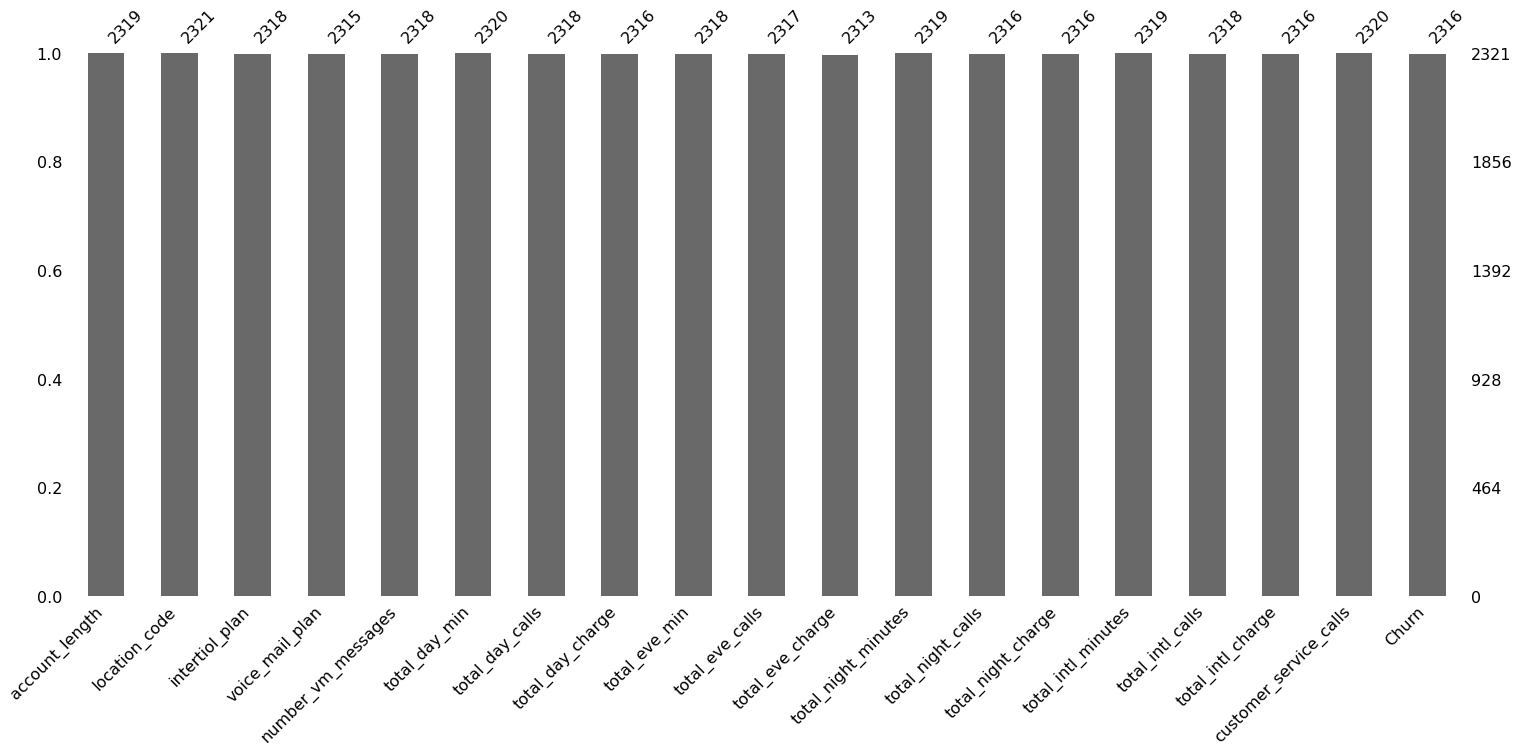

In [20]:
msno.bar(df_1)

In [21]:
df_1 = df_1.dropna()

In [22]:
df_1.isnull().sum()

account_length            0
location_code             0
intertiol_plan            0
voice_mail_plan           0
number_vm_messages        0
total_day_min             0
total_day_calls           0
total_day_charge          0
total_eve_min             0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
Churn                     0
dtype: int64

In [24]:
df_1.shape

(2276, 19)

<AxesSubplot:>

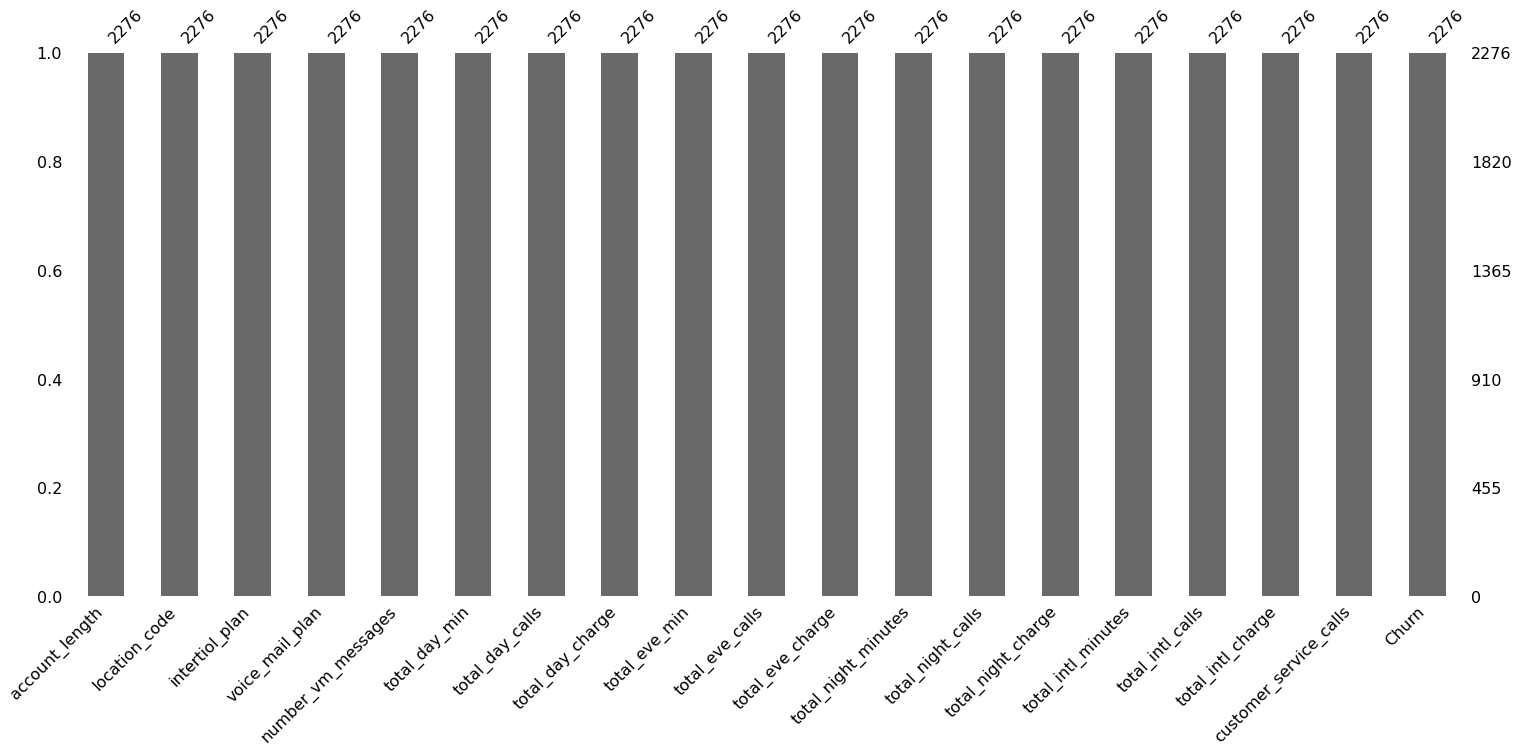

In [25]:
msno.bar(df_1)

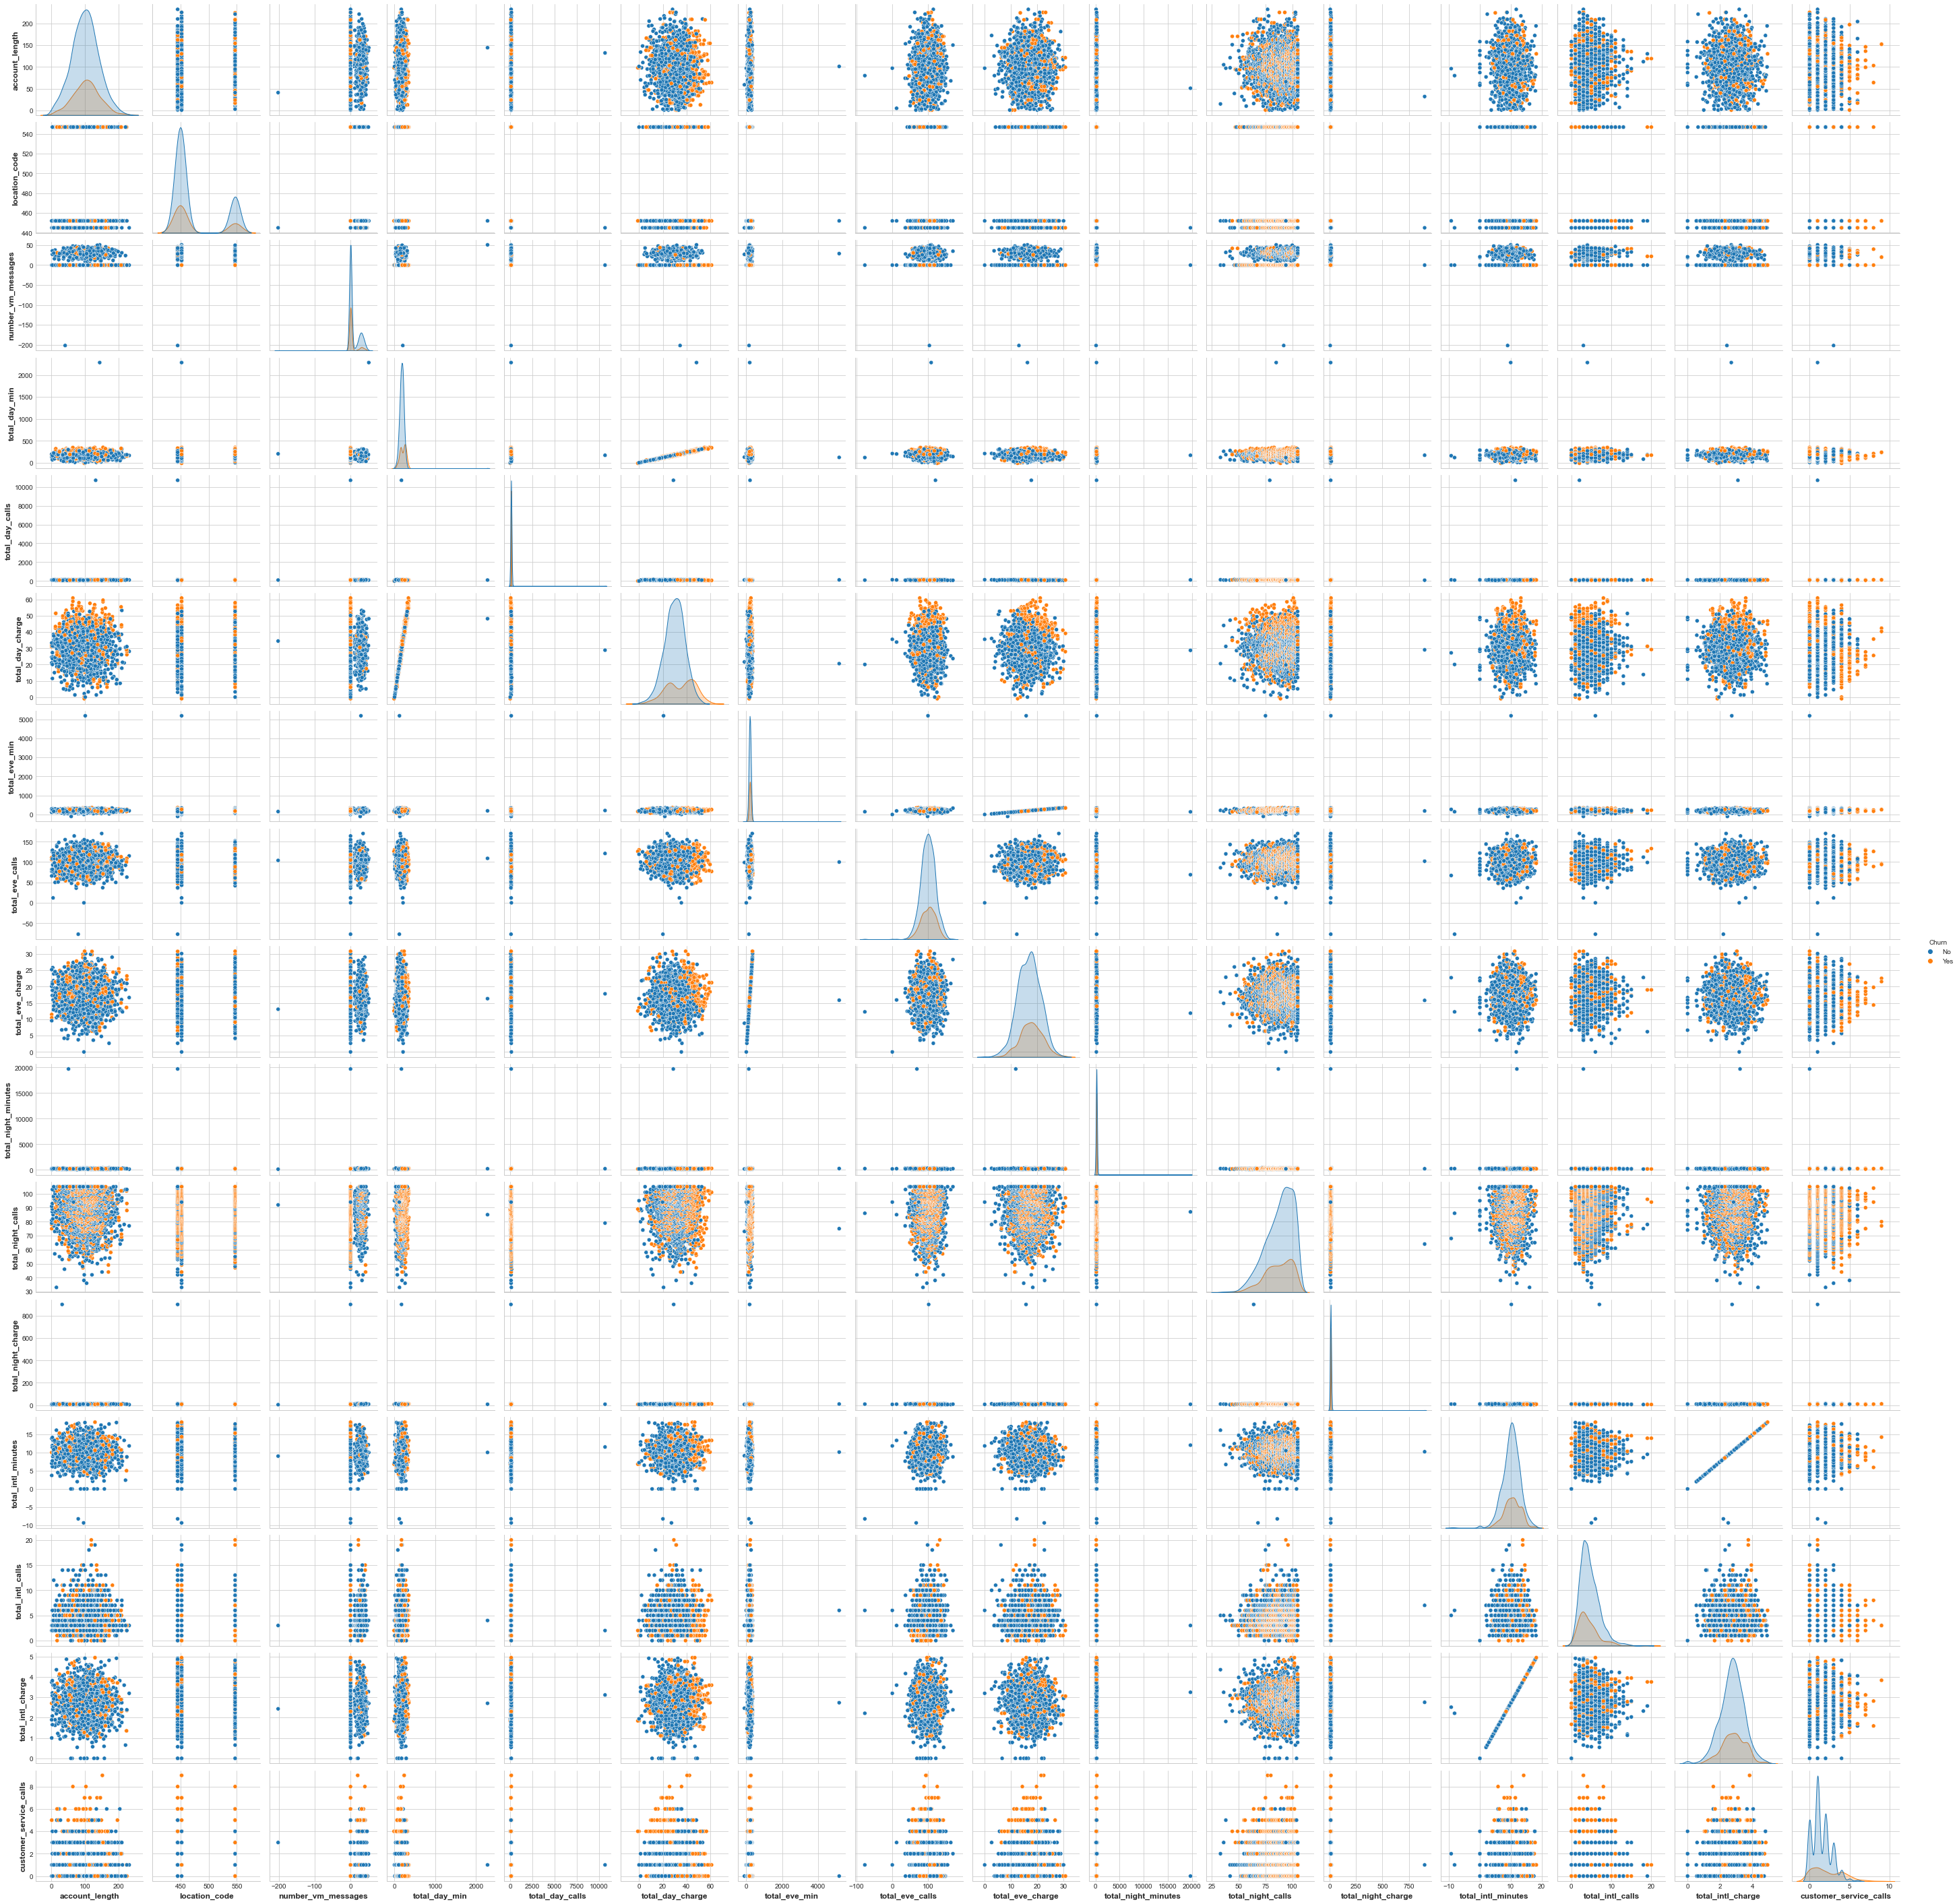

In [32]:
sns.pairplot(data =df_1,hue='Churn')

In [33]:
df_1.account_length.dtypes

dtype('float64')

In [35]:
df_1.Churn.dtypes

dtype('O')

In [47]:
def separates_feature_types(df):
    categorical= []
    numerical =[]
    for f in df.columns:
        if df[f].dtypes=='O':
            categorical.append(f)
        else:
            numerical.append(f)
    return categorical,numerical

In [48]:
categorical,numerical = separates_feature_types(df_1)

In [49]:
categorical

['intertiol_plan', 'voice_mail_plan', 'Churn']

In [52]:
df_1.location_code.dtypes

dtype('int64')

In [53]:
df_1.location_code.unique()

array([452, 445, 547], dtype=int64)

In [54]:
# location code categorical
# need to drop from numerical and put to the categorical
numerical.remove('location_code')
categorical.append('location_code')

In [55]:
categorical

['intertiol_plan', 'voice_mail_plan', 'Churn', 'location_code']

In [56]:
numerical

['account_length',
 'number_vm_messages',
 'total_day_min',
 'total_day_calls',
 'total_day_charge',
 'total_eve_min',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls']

# View Categorical

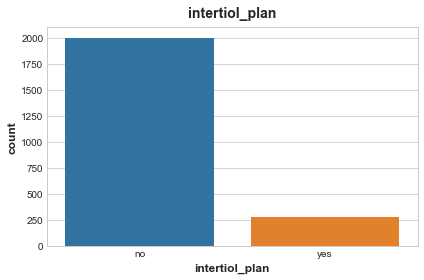

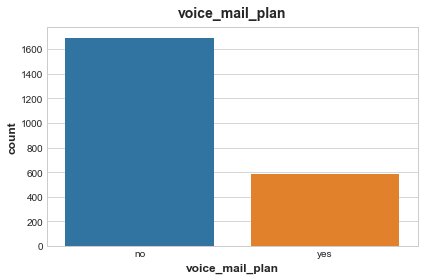

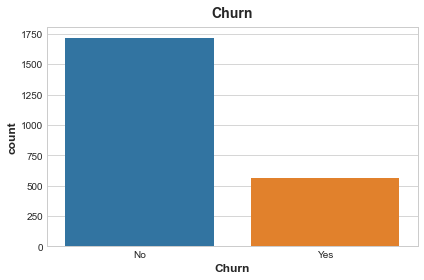

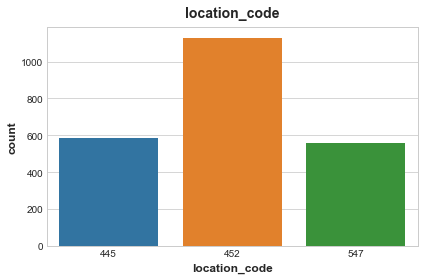

In [57]:
for f in categorical:
    ax = sns.countplot(x = df_1[f], data = df)
    plt.title(f)
    plt.show()

# View numerical

c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated 

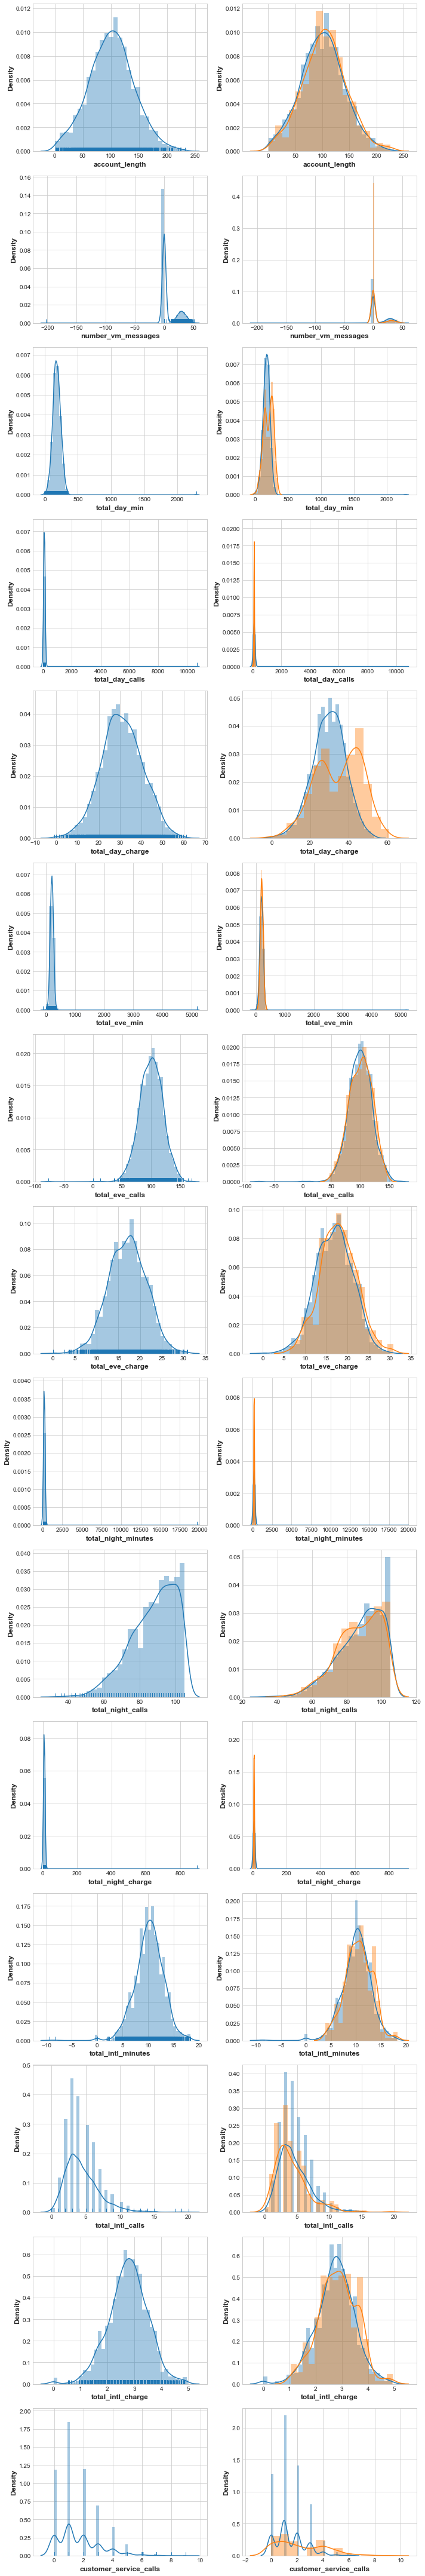

In [72]:
fig, axs = plt.subplots(len(numerical), 2, figsize=(10, 4*len(numerical)))
for i,f in enumerate(numerical):
    # print(i,f)
    sns.distplot(df_1[f],rug=True,ax=axs[i][0])
    sns.distplot(df_1[f][df_1.Churn=='No'],ax=axs[i][1])
    sns.distplot(df_1[f][df_1.Churn=='Yes'],ax=axs[i][1])
plt.show()

In [ ]:
#by seeeing these data

In [73]:
# Identify if there are data quality issues evident in the dataset and handle them.

## Check outliers

In [89]:
def check_outliers_by_visualisation(df,features):
    x=len(features)
    fig, axs = plt.subplots(x, 2, figsize=(10, 4*x))
    for i,f in enumerate(features):
        # print(i,f)
        sns.distplot(df[f],rug=True,ax=axs[i][0])
        sns.boxplot(x =f, y = 'Churn', data = df,ax=axs[i][1])
    plt.show()

c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no l

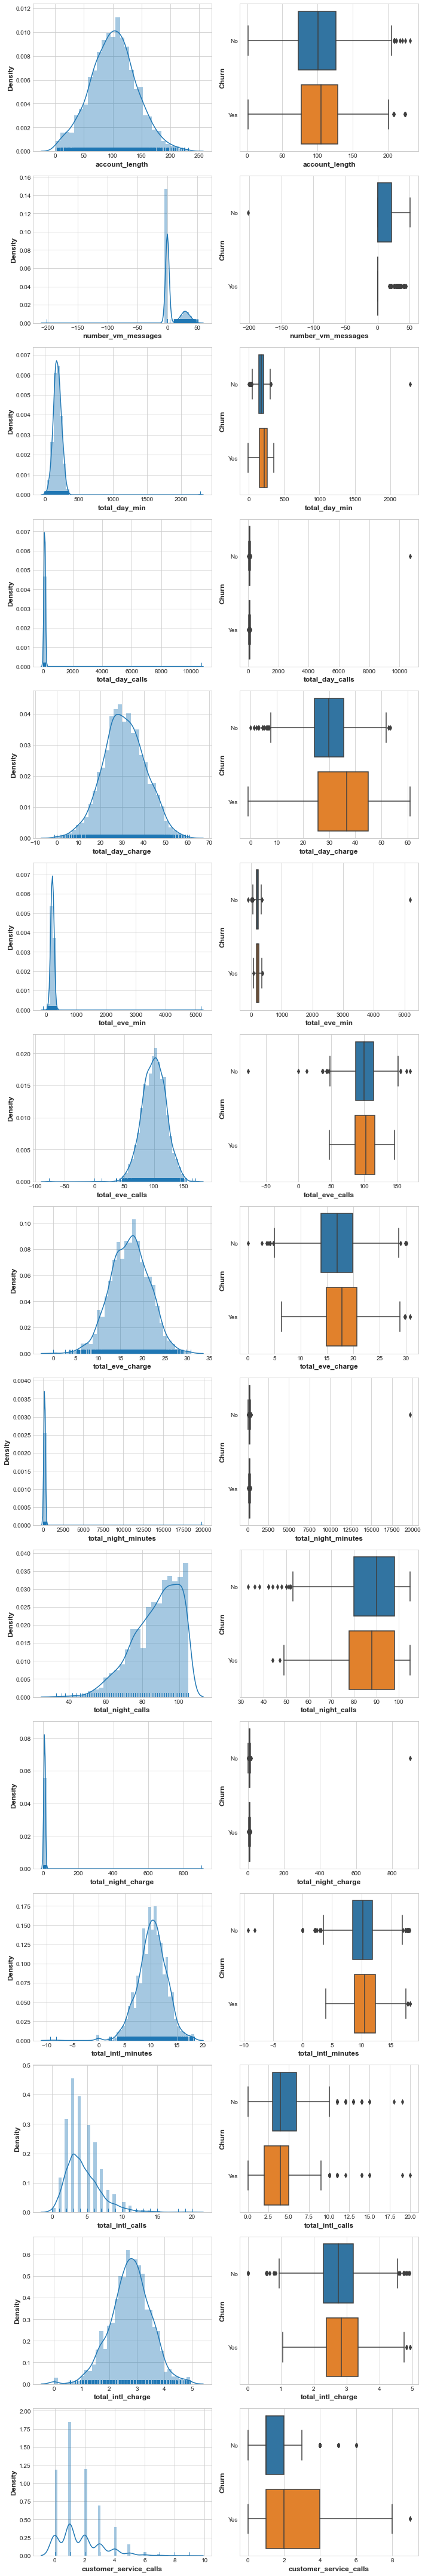

In [90]:
check_outliers_by_visualisation(df_1,numerical)

In [94]:
def get_quantile_bounds(df,features):
    bounds = {f:[0,0] for f in features}
    for f in features:
        q1= df[f].quantile(q=0.25)
        q3= df[f].quantile(q=0.75)
        IQR = q3 -q1
        lower_bound = q1-(1.5*IQR)
        upper_bound = q3+(1.5*IQR)
        bounds[f][0] = lower_bound
        bounds[f][1] = upper_bound
    return bounds

def replace_outliers_quantiles_by_median(df,bounds):
    cleaned_df = df.copy()
    for key in bounds.keys():
        # cleaned_df[cleaned_df[key]<bounds[key][0]][key]=bounds[key][0]
        # cleaned_df[cleaned_df[key]>bounds[key][1]][key]=bounds[key][1]
        m0 = df[key].median()
        m1 = df[key].median()
        cleaned_df.loc[cleaned_df[key] < bounds[key][0] , key] = m0
        cleaned_df.loc[cleaned_df[key] > bounds[key][1] , key] = m1
    return cleaned_df

In [95]:
bounds = get_quantile_bounds(df_1,numerical)
bounds

{'account_length': [-5.5, 206.5],
 'number_vm_messages': [-21.0, 35.0],
 'total_day_min': [28.799999999999983, 336.0],
 'total_day_calls': [45.0, 157.0],
 'total_day_charge': [4.862500000000008, 57.162499999999994],
 'total_eve_min': [60.3, 341.90000000000003],
 'total_eve_calls': [46.5, 154.5],
 'total_eve_charge': [5.301250000000001, 28.951249999999998],
 'total_night_minutes': [66.21249999999999, 336.3125],
 'total_night_calls': [50.5, 126.5],
 'total_night_charge': [2.9799999999999995, 15.14],
 'total_intl_minutes': [3.499999999999999, 17.1],
 'total_intl_calls': [-1.5, 10.5],
 'total_intl_charge': [0.9399999999999993, 4.620000000000001],
 'customer_service_calls': [-0.5, 3.5]}

In [ ]:
bounds

In [99]:
# remove outliers
cleaned_df =replace_outliers_quantiles_by_median(df_1,bounds)
cleaned_df.head()

C:\Users\Ayesh\AppData\Local\Temp\ipykernel_10208\2776730244.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[cleaned_df[key]>bounds[key][1]][key]=bounds[key][1]
C:\Users\Ayesh\AppData\Local\Temp\ipykernel_10208\2776730244.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[cleaned_df[key]<bounds[key][0]][key]=bounds[key][0]
C:\Users\Ayesh\AppData\Local\Temp\ipykernel_10208\2776730244.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

account_length  location_code intertiol_plan voice_mail_plan  \
0            15.0            452             no              no   
1           105.0            452             no              no   
2            97.0            452             no             yes   
3           121.0            445             no             yes   
4            98.0            452             no             yes   

   number_vm_messages  total_day_min  total_day_calls  total_day_charge  \
0                 0.0          121.1            130.0             20.59   
1                 0.0          259.3             96.0             44.08   
2                32.0          183.4             94.0             31.18   
3                35.0           68.7             95.0             11.68   
4                22.0          278.3             89.0             47.31   

   total_eve_min  total_eve_calls  total_eve_charge  total_night_minutes  \
0          216.0             86.0             18.36                235.1   
1          175.2             97.0             14.89                222.4   
2          269.1            120.0             22.87                203.5   
3          209.2             69.0             17.78                197.4   
4           93.4            143.0              7.94                107.6   

   total_night_calls  total_night_charge  total_intl_minutes  \
0               90.0               10.58                16.1   
1               90.0               10.01                12.0   
2               90.0                9.16                 6.7   
3               90.0                8.88                11.4   
4               90.0                4.84                 9.7   

   total_intl_calls  total_intl_charge  customer_service_calls Churn  
0               5.0               4.35                     2.0    No  
1               5.0               3.24                     3.0    No  
2               4.0               1.81                     1.0    No  
3               4.0               3.08                     1.0    No  
4               5.0               2.62                     0.0    No

c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no l

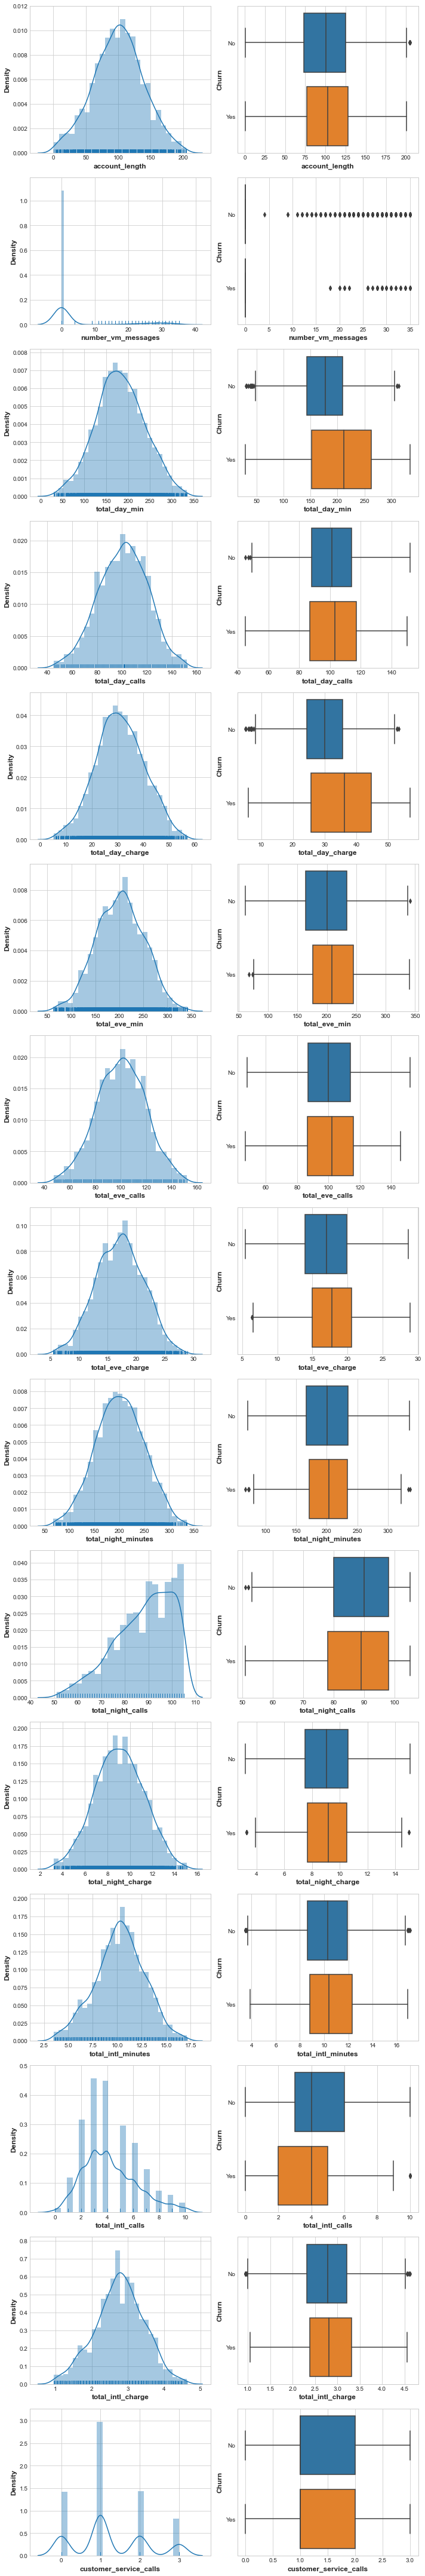

In [101]:
check_outliers_by_visualisation(cleaned_df,numerical)

# Encode Categorical values

In [102]:
categorical

['intertiol_plan', 'voice_mail_plan', 'Churn', 'location_code']

In [140]:
cleaned_df.intertiol_plan.unique()

array(['no', 'yes'], dtype=object)

In [141]:
cleaned_df.voice_mail_plan.unique()

array(['no', 'yes'], dtype=object)

In [142]:
cleaned_df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [143]:
cleaned_df.location_code.unique()

array([452, 445, 547], dtype=int64)

In [144]:
# encoded df
e_df = cleaned_df.copy()

e_df.intertiol_plan.replace('no',0,inplace=True)
e_df.intertiol_plan.replace('yes',1,inplace=True)

e_df.voice_mail_plan.replace('no',0,inplace=True)
e_df.voice_mail_plan.replace('yes',1,inplace=True)

e_df.Churn.replace('No',0,inplace=True)
e_df.Churn.replace('Yes',1,inplace=True)

In [145]:
print(e_df.intertiol_plan.unique())
print(e_df.voice_mail_plan.unique())
print(e_df.Churn.unique())

[0 1]
[0 1]
[0 1]


In [146]:
def one_hot_encoding(df,feature):
    data =df.copy()
    onehot = OneHotEncoder()
    onehot.fit(data[[feature]])

    encoded = onehot.transform(data[[feature]])
    data[onehot.categories_[0]] = encoded.toarray()
    return data.drop(feature, axis=1)

In [147]:
e_df=one_hot_encoding(e_df,'location_code')
e_df.head()

account_length  intertiol_plan  voice_mail_plan  number_vm_messages  \
0            15.0               0                0                 0.0   
1           105.0               0                0                 0.0   
2            97.0               0                1                32.0   
3           121.0               0                1                35.0   
4            98.0               0                1                22.0   

   total_day_min  total_day_calls  total_day_charge  total_eve_min  \
0          121.1            130.0             20.59          216.0   
1          259.3             96.0             44.08          175.2   
2          183.4             94.0             31.18          269.1   
3           68.7             95.0             11.68          209.2   
4          278.3             89.0             47.31           93.4   

   total_eve_calls  total_eve_charge  ...  total_night_calls  \
0             86.0             18.36  ...               90.0   
1             97.0             14.89  ...               90.0   
2            120.0             22.87  ...               90.0   
3             69.0             17.78  ...               90.0   
4            143.0              7.94  ...               90.0   

   total_night_charge  total_intl_minutes  total_intl_calls  \
0               10.58                16.1               5.0   
1               10.01                12.0               5.0   
2                9.16                 6.7               4.0   
3                8.88                11.4               4.0   
4                4.84                 9.7               5.0   

   total_intl_charge  customer_service_calls  Churn  445  452  547  
0               4.35                     2.0      0  0.0  1.0  0.0  
1               3.24                     3.0      0  0.0  1.0  0.0  
2               1.81                     1.0      0  0.0  1.0  0.0  
3               3.08                     1.0      0  1.0  0.0  0.0  
4               2.62                     0.0      0  0.0  1.0  0.0  

[5 rows x 21 columns]

# Scaling

In [152]:
e_df.describe()

account_length  intertiol_plan  voice_mail_plan  number_vm_messages  \
count     2276.000000     2276.000000      2276.000000         2276.000000   
mean       100.496924        0.122144         0.256591            5.264060   
std         38.805171        0.327524         0.436847           10.947232   
min          1.000000        0.000000         0.000000            0.000000   
25%         74.000000        0.000000         0.000000            0.000000   
50%        101.000000        0.000000         0.000000            0.000000   
75%        126.000000        0.000000         1.000000            0.000000   
max        205.000000        1.000000         1.000000           35.000000   

       total_day_min  total_day_calls  total_day_charge  total_eve_min  \
count    2276.000000      2276.000000       2276.000000    2276.000000   
mean      182.265092       100.763401         30.995321     201.511951   
std        55.866560        19.602891          9.465494      49.373120   
min        29.500000        45.000000          5.080000      61.900000   
25%       144.575000        87.000000         24.607500     166.600000   
50%       180.150000       101.500000         30.590000     202.300000   
75%       220.200000       115.000000         37.462500     236.100000   
max       334.300000       152.000000         56.830000     341.300000   

       total_eve_calls  total_eve_charge  ...  total_night_calls  \
count      2276.000000       2276.000000  ...        2276.000000   
mean        100.322496         17.122195  ...          87.917838   
std          19.256388          4.169583  ...          12.300838   
min          47.000000          5.470000  ...          51.000000   
25%          87.000000         14.207500  ...          80.000000   
50%         101.000000         17.205000  ...          90.000000   
75%         114.000000         20.052500  ...          98.000000   
max         152.000000         28.890000  ...         105.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         2276.000000         2276.000000       2276.000000   
mean             9.062386           10.271573          4.234622   
std              2.186046            2.517694          2.066234   
min              3.200000            3.500000          0.000000   
25%              7.570000            8.700000          3.000000   
50%              9.045000           10.300000          4.000000   
75%             10.562500           12.000000          6.000000   
max             15.060000           17.100000         10.000000   

       total_intl_charge  customer_service_calls        Churn          445  \
count        2276.000000             2276.000000  2276.000000  2276.000000   
mean            2.773449                1.250439     0.245606     0.258348   
std             0.679787                0.929906     0.430541     0.437822   
min             0.950000                0.000000     0.000000     0.000000   
25%             2.350000                1.000000     0.000000     0.000000   
50%             2.780000                1.000000     0.000000     0.000000   
75%             3.240000                2.000000     0.000000     1.000000   
max             4.620000                3.000000     1.000000     1.000000   

               452          547  
count  2276.000000  2276.000000  
mean      0.496046     0.245606  
std       0.500094     0.430541  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       1.000000     0.000000  
max       1.000000     1.000000  

[8 rows x 21 columns]

In [153]:
e_df[numerical].describe()

account_length  number_vm_messages  total_day_min  total_day_calls  \
count     2276.000000         2276.000000    2276.000000      2276.000000   
mean       100.496924            5.264060     182.265092       100.763401   
std         38.805171           10.947232      55.866560        19.602891   
min          1.000000            0.000000      29.500000        45.000000   
25%         74.000000            0.000000     144.575000        87.000000   
50%        101.000000            0.000000     180.150000       101.500000   
75%        126.000000            0.000000     220.200000       115.000000   
max        205.000000           35.000000     334.300000       152.000000   

       total_day_charge  total_eve_min  total_eve_calls  total_eve_charge  \
count       2276.000000    2276.000000      2276.000000       2276.000000   
mean          30.995321     201.511951       100.322496         17.122195   
std            9.465494      49.373120        19.256388          4.169583   
min            5.080000      61.900000        47.000000          5.470000   
25%           24.607500     166.600000        87.000000         14.207500   
50%           30.590000     202.300000       101.000000         17.205000   
75%           37.462500     236.100000       114.000000         20.052500   
max           56.830000     341.300000       152.000000         28.890000   

       total_night_minutes  total_night_calls  total_night_charge  \
count          2276.000000        2276.000000         2276.000000   
mean            201.423374          87.917838            9.062386   
std              48.555500          12.300838            2.186046   
min              67.400000          51.000000            3.200000   
25%             168.300000          80.000000            7.570000   
50%             201.000000          90.000000            9.045000   
75%             234.700000          98.000000           10.562500   
max             335.700000         105.000000           15.060000   

       total_intl_minutes  total_intl_calls  total_intl_charge  \
count         2276.000000       2276.000000        2276.000000   
mean            10.271573          4.234622           2.773449   
std              2.517694          2.066234           0.679787   
min              3.500000          0.000000           0.950000   
25%              8.700000          3.000000           2.350000   
50%             10.300000          4.000000           2.780000   
75%             12.000000          6.000000           3.240000   
max             17.100000         10.000000           4.620000   

       customer_service_calls  
count             2276.000000  
mean                 1.250439  
std                  0.929906  
min                  0.000000  
25%                  1.000000  
50%                  1.000000  
75%                  2.000000  
max                  3.000000

In [167]:
# creating the object of minmax scaler
def min_max_scaler(df):
    data = df.copy()
    columns = data.columns
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data.values)
    data[columns] = scaled
    return data

In [170]:
s_df = min_max_scaler(e_df)

In [171]:
s_df.head()

account_length  intertiol_plan  voice_mail_plan  number_vm_messages  \
0        0.068627             0.0              0.0            0.000000   
1        0.509804             0.0              0.0            0.000000   
2        0.470588             0.0              1.0            0.914286   
3        0.588235             0.0              1.0            1.000000   
4        0.475490             0.0              1.0            0.628571   

   total_day_min  total_day_calls  total_day_charge  total_eve_min  \
0       0.300525         0.794393          0.299710       0.551539   
1       0.753937         0.476636          0.753623       0.405512   
2       0.504921         0.457944          0.504348       0.741589   
3       0.128609         0.467290          0.127536       0.527201   
4       0.816273         0.411215          0.816039       0.112742   

   total_eve_calls  total_eve_charge  ...  total_night_calls  \
0         0.371429          0.550384  ...           0.722222   
1         0.476190          0.402220  ...           0.722222   
2         0.695238          0.742955  ...           0.722222   
3         0.209524          0.525619  ...           0.722222   
4         0.914286          0.105465  ...           0.722222   

   total_night_charge  total_intl_minutes  total_intl_calls  \
0            0.622260            0.926471               0.5   
1            0.574199            0.625000               0.5   
2            0.502530            0.235294               0.4   
3            0.478921            0.580882               0.4   
4            0.138280            0.455882               0.5   

   total_intl_charge  customer_service_calls  Churn  445  452  547  
0           0.926431                0.666667    0.0  0.0  1.0  0.0  
1           0.623978                1.000000    0.0  0.0  1.0  0.0  
2           0.234332                0.333333    0.0  0.0  1.0  0.0  
3           0.580381                0.333333    0.0  1.0  0.0  0.0  
4           0.455041                0.000000    0.0  0.0  1.0  0.0  

[5 rows x 21 columns]

In [4]:
##
test = pd.read_csv("Validation_Dataset.csv")

In [5]:
test.isnull().sum()

customer_id                  0
account_length               0
location_code                1
intertiol_plan               2
voice_mail_plan              3
number_vm_messages           1
total_day_min                2
total_day_calls              3
total_day_charge             3
total_eve_min                2
total_eve_calls              0
total_eve_charge             6
total_night_minutes          1
total_night_calls            2
total_night_charge           1
total_intl_minutes           2
total_intl_calls             2
total_intl_charge            0
customer_service_calls       1
Unnamed: 19               1000
Unnamed: 20               1000
dtype: int64